In [1]:
setwd("C:/Users/franc/Desktop/BU_MS_ANALYTICS/1Semester/CS555/Term_project")

In [4]:
install.packages("asbio")

also installing the dependencies 'memoise', 'scatterplot3d', 'pixmap', 'plotrix', 'mvtnorm', 'deSolve', 'tkrplot', 'combinat', 'multcompView', 'gWidgets2', 'gWidgets2tcltk'



package 'memoise' successfully unpacked and MD5 sums checked
package 'scatterplot3d' successfully unpacked and MD5 sums checked
package 'pixmap' successfully unpacked and MD5 sums checked
package 'plotrix' successfully unpacked and MD5 sums checked
package 'mvtnorm' successfully unpacked and MD5 sums checked
package 'deSolve' successfully unpacked and MD5 sums checked
package 'tkrplot' successfully unpacked and MD5 sums checked
package 'combinat' successfully unpacked and MD5 sums checked
package 'multcompView' successfully unpacked and MD5 sums checked
package 'gWidgets2' successfully unpacked and MD5 sums checked
package 'gWidgets2tcltk' successfully unpacked and MD5 sums checked
package 'asbio' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\franc\AppData\Local\Temp\Rtmp80FZ3h\downloaded_packages


In [6]:
install.packages("RSQLite")

also installing the dependencies 'ellipsis', 'rlang', 'bit', 'vctrs', 'bit64', 'blob', 'DBI'




  There is a binary version available but the source version is later:
      binary source needs_compilation
rlang  0.4.8  0.4.9              TRUE

  Binaries will be installed
package 'ellipsis' successfully unpacked and MD5 sums checked
package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\franc\Anaconda3\envs\MSDataAnalytics\Lib\R\library\00LOCK\rlang\libs\x64\rlang.dll to C:\Users\franc\Anaconda3\envs\MSDataAnalytics\Lib\R\library\rlang\libs\x64\rlang.dll: Permission denied"Warning message:
"restored 'rlang'"

package 'bit' successfully unpacked and MD5 sums checked
package 'vctrs' successfully unpacked and MD5 sums checked
package 'bit64' successfully unpacked and MD5 sums checked
package 'blob' successfully unpacked and MD5 sums checked
package 'DBI' successfully unpacked and MD5 sums checked
package 'RSQLite' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\franc\AppData\Local\Temp\Rtmp80FZ3h\downloaded_packages


In [9]:
library(ggplot2)
library(dbplyr)
library(tidyr)
library(tidyverse)
library(asbio)
library(data.table)
library(zoo)
library(xts)


Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Attaching package: 'xts'

The following objects are masked from 'package:data.table':

    first, last

The following objects are masked from 'package:dplyr':

    first, last



In [10]:
df <- read.csv(file = 'final.csv', sep = ',', header = TRUE)

In [11]:
df <- df[,c(2,4,6,7,8,9,10,11)]

In [12]:
df$period_begin <- as.Date(df$period_begin)

df <- subset(df,format(df$period_begin,'%Y')=='2017'| 
               format(df$period_begin,'%Y')=='2018' | 
               format(df$period_begin,'%Y')=='2019' |
               format(df$period_begin,'%Y')=='2020')

# ordering by date:

df <- df[order(df$period_begin),]


# Creating a new columns date factor:

#df[df$period_begin >= '2020-01-01',]
#df[df$period_begin >= '2019-01-01' & df$period_begin < '2020-01-01' ,]


year <- function(date.column){
  
  year.factor <- c()
  
  for (i in 1:length(date.column)){
    
    if(date.column[i]  >= '2020-01-01'){
      
      year.factor[i] = '2020'
      
    }else if (date.column[i]  >= '2019-01-01') {
      year.factor[i] = '2019'
    }else if (date.column[i]  >= '2018-01-01') {
      year.factor[i] = '2018'
    }else{
      year.factor[i] = '2017'
    }
    
  }

  return(year.factor)
}

year.factor <- year(df$period_begin)

df <- cbind(df, Year = year.factor) 


In [13]:
df$duration <- as.factor(df$duration)
df$Year <- as.factor(df$Year)
df$Name <- as.factor(df$Name)
df$Pop.Density <- as.factor(df$Pop.Density)

In [14]:
attach(df)

summary(df)

# Check for NANs:

any(is.na(df)) 

  period_begin            duration   average_homes_sold median_sale_price
 Min.   :2017-01-02   1 weeks :657   Min.   : 50.0      Min.   :230000   
 1st Qu.:2017-12-11   12 weeks:729   1st Qu.:114.0      1st Qu.:363000   
 Median :2018-11-12   4 weeks :705   Median :147.0      Median :465000   
 Mean   :2018-11-14                  Mean   :174.3      Mean   :466953   
 3rd Qu.:2019-10-21                  3rd Qu.:201.0      3rd Qu.:573965   
 Max.   :2020-10-19                  Max.   :872.0      Max.   :775000   
 median_days_to_close average_new_listings Pop.Density         Name    
 Min.   :31.00        Min.   : 14.0        458.1 :290   Bristol  :407  
 1st Qu.:39.00        1st Qu.:142.0        797.2 :407   Essex    :302  
 Median :44.60        Median :189.0        914.2 :302   Middlesex:311  
 Mean   :43.31        Mean   :214.1        1536.8:289   Norfolk  :289  
 3rd Qu.:47.00        3rd Qu.:250.0        1817.9:311   Plymouth :290  
 Max.   :59.00        Max.   :810.0        6221.3:

[1] FALSE

In [16]:
head(df, 10)

,period_begin,duration,average_homes_sold,median_sale_price,median_days_to_close,average_new_listings,Pop.Density,Name,Year
270,2017-01-02,12 weeks,111,421479.1,51.2,178,1536.8,Norfolk,2017
483,2017-01-02,4 weeks,92,553500.0,54.0,112,6221.3,Suffolk,2017
726,2017-01-02,12 weeks,88,546312.5,50.7,146,6221.3,Suffolk,2017
849,2017-01-02,1 weeks,201,505000.0,53.0,265,1817.9,Middlesex,2017
967,2017-01-02,4 weeks,224,474750.0,53.7,260,1817.9,Middlesex,2017
1182,2017-01-02,1 weeks,133,363000.0,53.0,135,914.2,Essex,2017
1295,2017-01-02,12 weeks,129,360729.1,49.8,180,914.2,Essex,2017
1759,2017-01-02,12 weeks,79,253463.0,50.0,123,797.2,Bristol,2017
437,2017-01-09,1 weeks,111,595000.0,58.0,111,6221.3,Suffolk,2017
584,2017-01-09,4 weeks,98,534750.0,53.5,115,6221.3,Suffolk,2017



	Shapiro-Wilk normality test

data:  average_homes_sold
W = 0.806, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  median_sale_price
W = 0.96398, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  median_days_to_close
W = 0.95702, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  average_new_listings
W = 0.86348, p-value < 2.2e-16


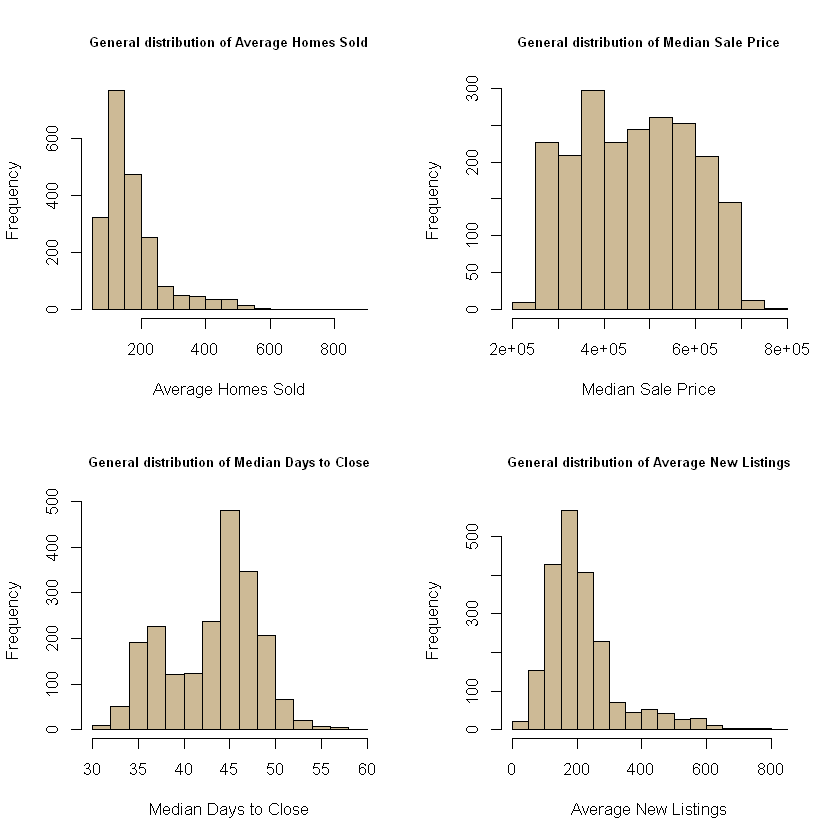

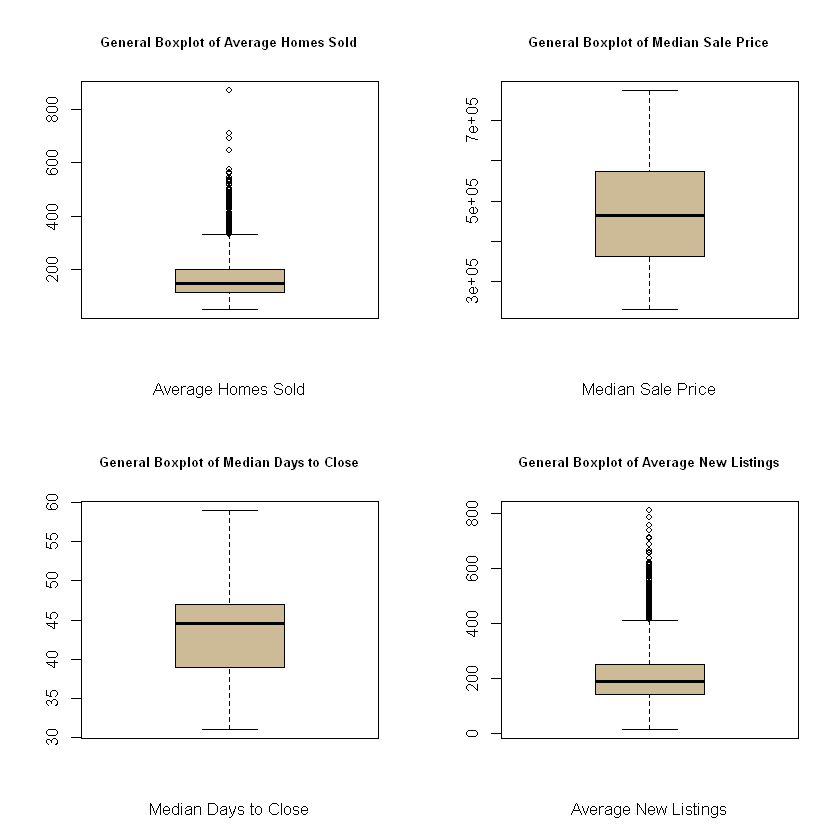

In [17]:
h <- function(col, name){
  hist(col, xlab = sprintf("%s", name), 
                    main = sprintf('General distribution of %s', name),
       cex.main = 0.8, col = 'wheat3')
}


par(mfrow = c(2,2))

h(average_homes_sold, 'Average Homes Sold')
h(median_sale_price, 'Median Sale Price')
h(median_days_to_close, 'Median Days to Close')
h(average_new_listings, 'Average New Listings')



par(mfrow = c(1,1))



# Shapiro-Wilk Test for the distribution

shapiro.test(average_homes_sold)
shapiro.test(median_sale_price)
shapiro.test(median_days_to_close)
shapiro.test(average_new_listings)

# Checking for general outliers 


b <- function(col, name, y = '', main = 'General Boxplot of %s', graph = boxplot){
  graph(col, xlab = sprintf("%s", name), ylab = y,
       main = sprintf(main, name),
       cex.main = 0.8, col = 'wheat3')
}

par(mfrow = c(2,2))

b(average_homes_sold, 'Average Homes Sold')
b(median_sale_price, 'Median Sale Price')
b(median_days_to_close, 'Median Days to Close')
b(average_new_listings, 'Average New Listings')

par(mfrow = c(1,1))


# Dealing with general outliers: 

df$average_homes_sold[df$average_homes_sold < quantile(df$average_homes_sold, probs = 0.25) - 1.5*IQR(df$average_homes_sold) |
                          
                          df$average_homes_sold > quantile(df$average_homes_sold, probs = 0.75) + 1.5*IQR(df$average_homes_sold)] <- NA

df$median_sale_price[df$median_sale_price < quantile(df$median_sale_price, probs = 0.25) - 1.5*IQR(df$median_sale_price) |
                          
                          df$median_sale_price > quantile(df$median_sale_price, probs = 0.75) + 1.5*IQR(df$median_sale_price)] <- NA

df$median_days_to_close[df$median_days_to_close < quantile(df$median_days_to_close, probs = 0.25) - 1.5*IQR(df$median_days_to_close) |
                          
                          df$median_days_to_close > quantile(df$median_days_to_close, probs = 0.75) + 1.5*IQR(df$median_days_to_close)] <- NA


df$average_new_listings[df$average_new_listings < quantile(df$average_new_listings, probs = 0.25) - 1.5*IQR(df$average_new_listings) |
                          
                          df$average_new_listings > quantile(df$average_new_listings, probs = 0.75) + 1.5*IQR(df$average_new_listings)] <- NA

# consulted: (Stack Overflow and d8aninja )



df <- na.omit(df) 

detach(df)

attach(df)

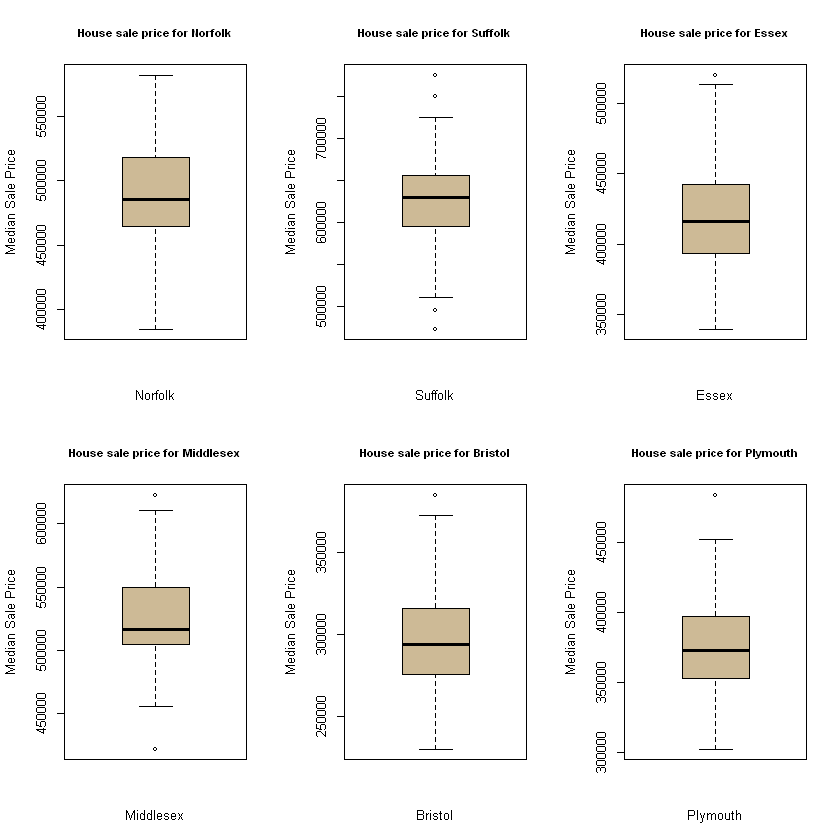

In [18]:
############################# 3. Analytics :####################################

###############Question a:###################

# Are there any significant differences in Median House Sale Price
# between 'Average Homes Sold' and the years 2017, 2018 , 2019, 2020?.

# The variable population density will not be considered here since it derives
# from the variable county. This is done in order to avoid using two measurement
# for the same group unit (dependency)

# i : First, testing for normality and homogeneity of variances for the groups
# of the two factor variables(Year and County) after dealing with potential outliers:



##### Outliers: ######


# Name (county):

Norfolk <- median_sale_price[Name == 'Norfolk']
Suffolk <-median_sale_price[Name == 'Suffolk']
Essex <- median_sale_price[Name == 'Essex']
Middlesex <- median_sale_price[Name == 'Middlesex']
Bristol <- median_sale_price[Name == 'Bristol']
Plymouth <- median_sale_price[Name == 'Plymouth']

par(mfrow = c(2,3))

b(Norfolk, 'Norfolk', y = 'Median Sale Price', main = 'House sale price for %s')
b(Suffolk, 'Suffolk', y = 'Median Sale Price', main = 'House sale price for %s')
b(Essex, 'Essex', y = 'Median Sale Price', main = 'House sale price for %s')
b(Middlesex, 'Middlesex', y = 'Median Sale Price', main = 'House sale price for %s')
b(Bristol, 'Bristol', y = 'Median Sale Price', main = 'House sale price for %s')
b(Plymouth, 'Plymouth', y = 'Median Sale Price', main = 'House sale price for %s')

In [19]:
par(mfrow = c(1,1))

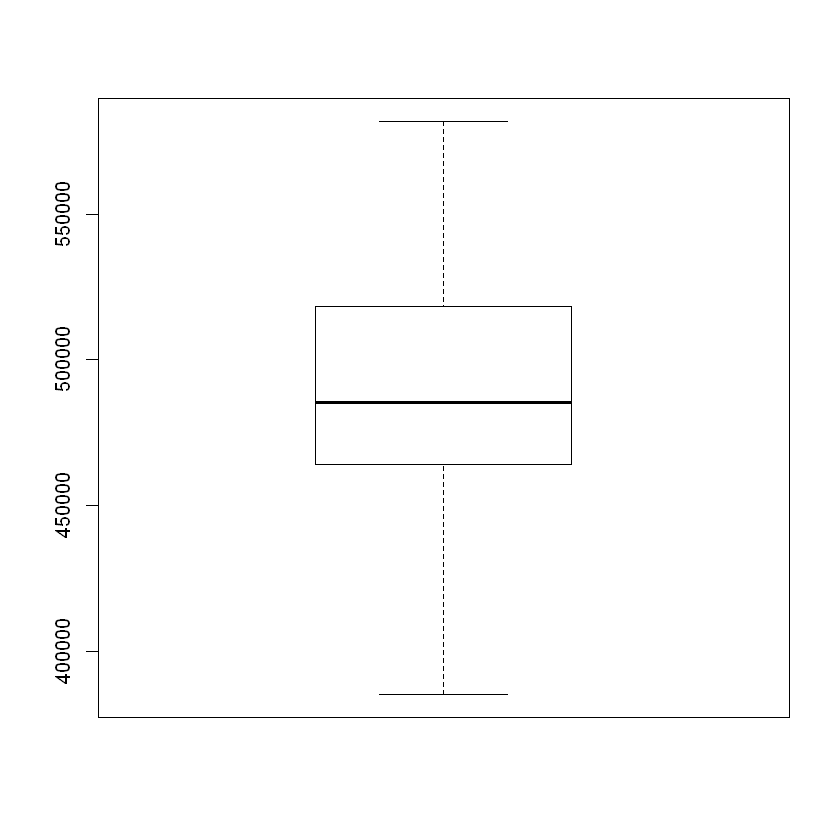

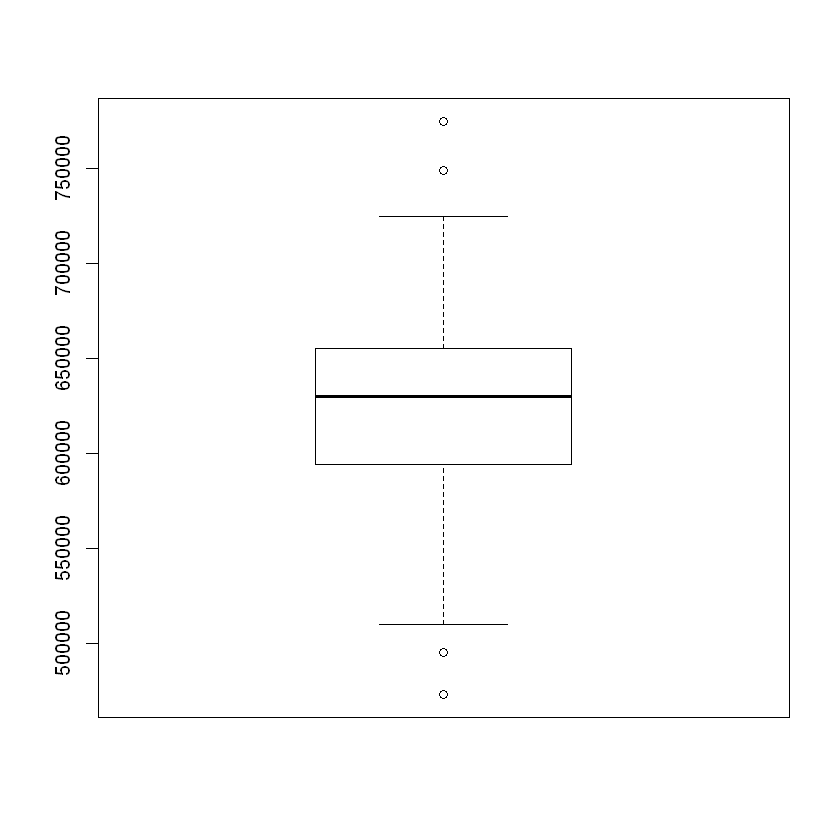

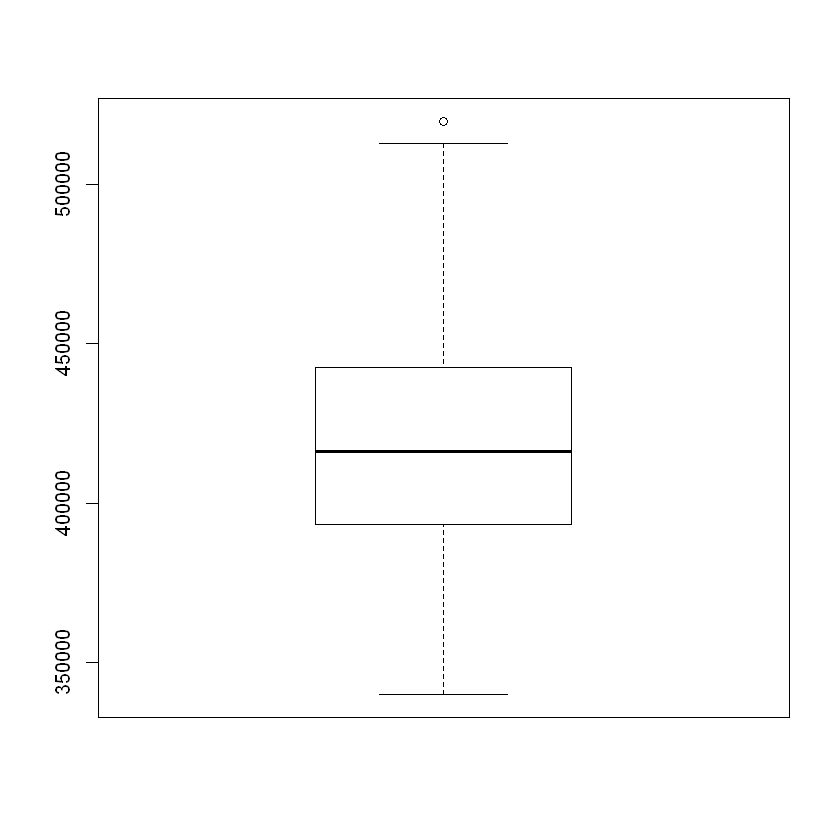

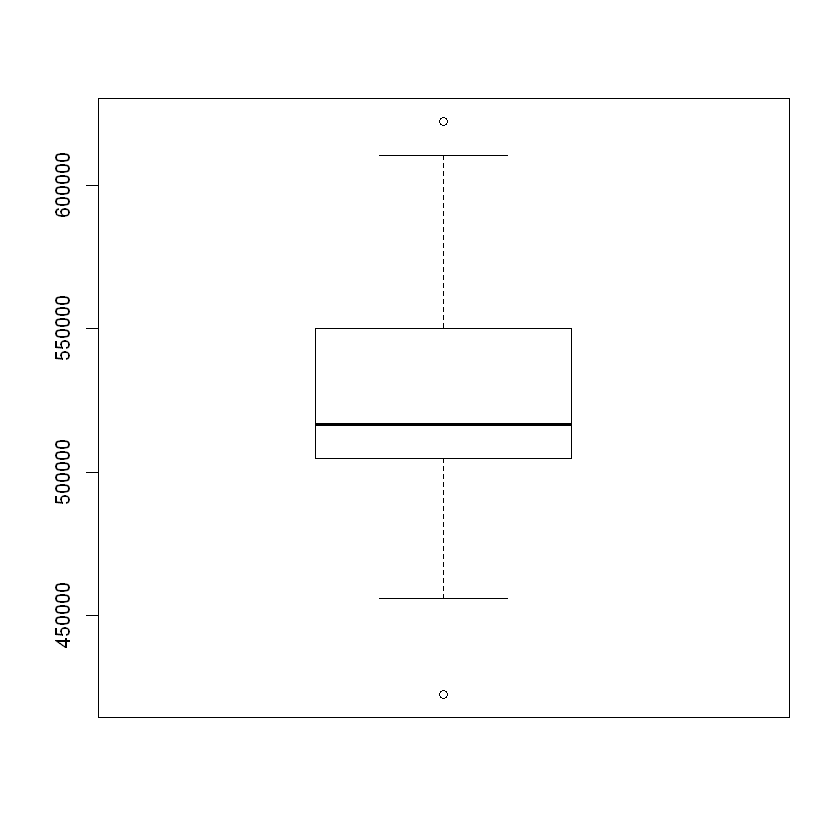

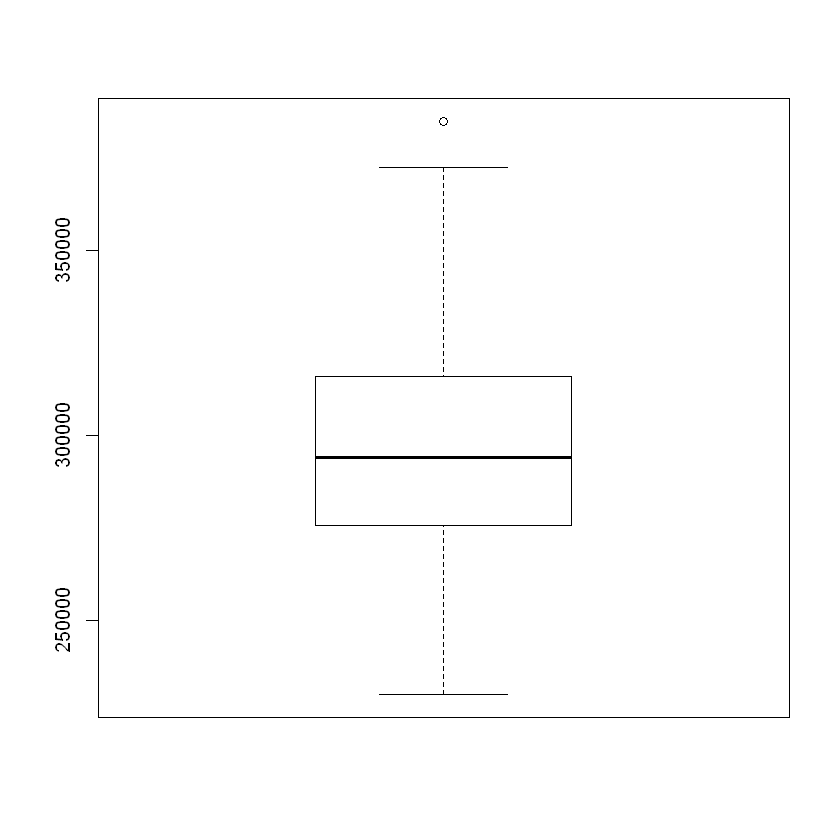

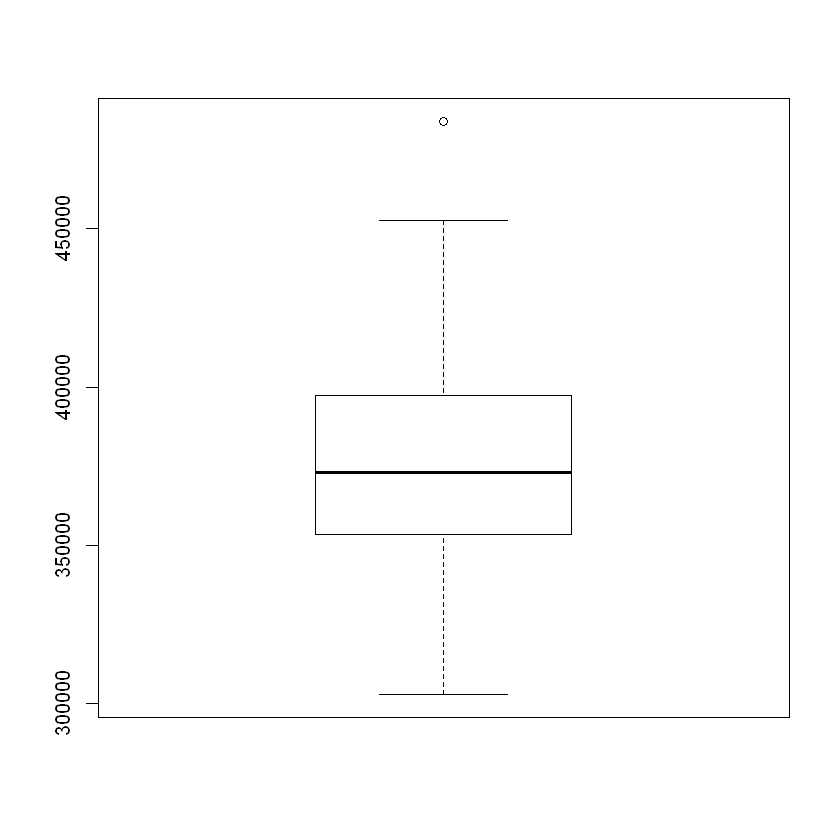

In [20]:
county.outliers <- c(boxplot(Norfolk)$out,boxplot(Suffolk)$out, boxplot(Essex)$out,
                     boxplot(Middlesex)$out, boxplot(Bristol)$out,boxplot(Plymouth)$out )

for (i in county.outliers){
  df$median_sale_price[df$median_sale_price == i] <- NA
  }
    



df <- na.omit(df)  

detach(df)
attach(df)

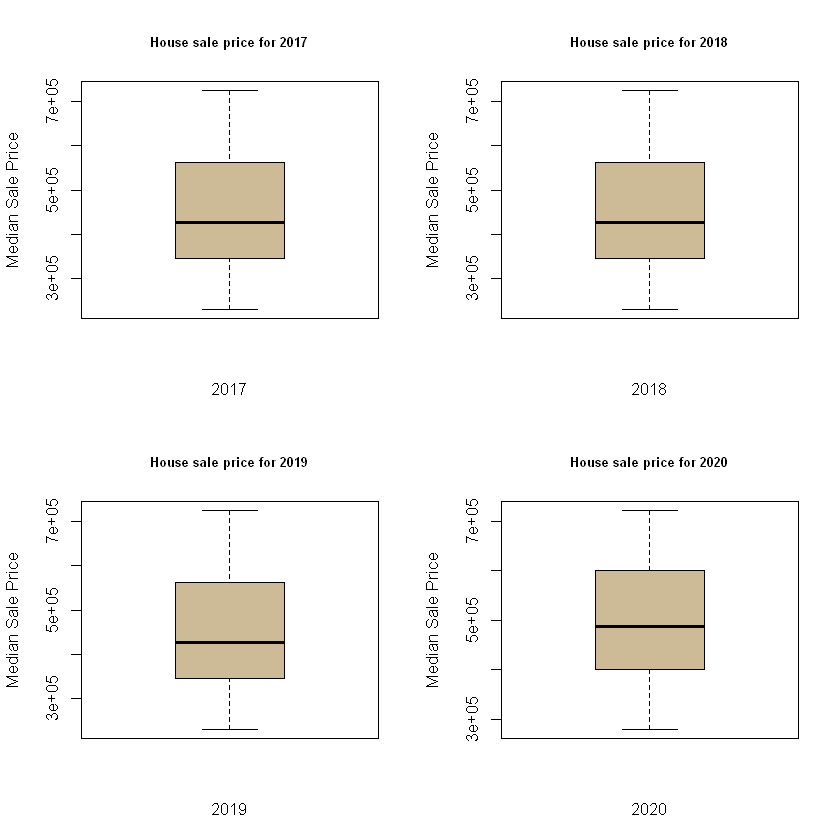

In [21]:
df <- na.omit(df)  

detach(df)
attach(df)


# Year: 

year2017 <- median_sale_price[period_begin < '2018-01-01']

year2018 <- median_sale_price[period_begin < '2019-01-01']

year2019 <- median_sale_price[period_begin < '2020-01-01']
  
year2020 <- median_sale_price[period_begin >= '2020-01-01']



par(mfrow = c(2,2))

b(year2019 , '2017', y = 'Median Sale Price', main = 'House sale price for %s')
b(year2019 , '2018', y = 'Median Sale Price', main = 'House sale price for %s')
b(year2019 , '2019', y = 'Median Sale Price', main = 'House sale price for %s')
b(year2020, '2020', y = 'Median Sale Price', main = 'House sale price for %s')

par(mfrow = c(1,1))




In [22]:
### Summary for years 2017 to 2020 ####


df2017 <- subset(df, Year == '2017')
df2018 <- subset(df, Year == '2018')
df2019 <- subset(df, Year == '2019')
df2020  <- subset(df, Year == '2020')



# Overall:

summary(df2017$median_sale_price)
summary(df2018$median_sale_price)
summary(df2019$median_sale_price)
summary(df2020$median_sale_price)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 230000  336809  400150  423976  553875  681500 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 254950  353209  419000  447649  575000  725000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 267500  362563  444827  467711  594500  711500 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 278500  399784  487437  497780  601056  722500 

In [23]:
# Per county and year:

summary(subset(df2017$median_sale_price, Name == 'Norfolk'))
summary(subset(df2017$median_sale_price, Name == 'Suffolk'))
summary(subset(df2017$median_sale_price, Name == 'Essex'))
summary(subset(df2017$median_sale_price, Name == 'Middlesex'))
summary(subset(df2017$median_sale_price, Name == 'Bristol'))
summary(subset(df2017$median_sale_price, Name == 'Plymouth'))

summary(subset(df2018$median_sale_price, Name == 'Norfolk'))
summary(subset(df2018$median_sale_price, Name == 'Suffolk'))
summary(subset(df2018$median_sale_price, Name == 'Essex'))
summary(subset(df2018$median_sale_price, Name == 'Middlesex'))
summary(subset(df2018$median_sale_price, Name == 'Bristol'))
summary(subset(df2018$median_sale_price, Name == 'Plymouth'))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 399125  449462  455934  456781  470815  519000     214 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 510188  571000  580896  580082  595000  681500     351 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 339750  368222  386013  382455  393954  419000     220 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 456000  472688  504871  494008  510481  548900      61 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 230000  258194  274142  268834  278771  295000     298 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 302750  341100  349900  347058  354669  410000     212 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 269875  300000  377063  413804  498625  654663     209 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 254950  363406  466323  471520  619325  725000     343 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 272733  393406  462913  489643  617770  699000     218 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 274113  402215  462283  467195  575000  619125      60 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 262950  303000  416121  446040  575000  720000     293 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 255000  302281  378331  389342  414323  669900     209 

In [26]:
length(subset(df$median_sale_price , Name == 'Norfolk' & Year == 2017))

[1] 72

In [27]:
summary(subset(df2019$median_sale_price, Name == 'Norfolk'))
summary(subset(df2019$median_sale_price, Name == 'Suffolk'))
summary(subset(df2019$median_sale_price, Name == 'Essex'))
summary(subset(df2019$median_sale_price, Name == 'Middlesex'))
summary(subset(df2019$median_sale_price, Name == 'Bristol'))
summary(subset(df2019$median_sale_price, Name == 'Plymouth'))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 301175  392348  483077  492747  621594  711500     214 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 295000  402787  483932  497045  618000  707750     351 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 278725  315627  438869  447701  544750  691750     220 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 280000  409063  502938  495928  619797  679625      61 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 267500  314319  391424  420631  491467  675000     298 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 282475  370728  455517  469447  601927  686625     212 

In [28]:
summary(subset(df2020$median_sale_price, Name == 'Norfolk'))
summary(subset(df2020$median_sale_price, Name == 'Suffolk'))
summary(subset(df2020$median_sale_price, Name == 'Essex'))
summary(subset(df2020$median_sale_price, Name == 'Middlesex'))
summary(subset(df2020$median_sale_price, Name == 'Bristol'))
summary(subset(df2020$median_sale_price, Name == 'Plymouth'))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 331850  452500  575100  545556  654283  676438     229 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 307500  380000  464350  470600  547958  690000     381 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 293263  344427  440969  454900  550981  687292     238 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 278500  350875  435438  457892  515417  720875      73 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 315121  414963  514913  512469  616822  722500     324 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 299000  443931  559417  532023  649697  720000     231 


	Shapiro-Wilk normality test

data:  Norfolk
W = 0.98017, p-value = 0.0004997



	Shapiro-Wilk normality test

data:  Suffolk
W = 0.98933, p-value = 0.001201



	Shapiro-Wilk normality test

data:  Essex
W = 0.98198, p-value = 0.0008794



	Shapiro-Wilk normality test

data:  Middlesex
W = 0.98033, p-value = 0.2143



	Shapiro-Wilk normality test

data:  Bristol
W = 0.97782, p-value = 6.932e-06



	Shapiro-Wilk normality test

data:  Plymouth
W = 0.96961, p-value = 8.871e-06


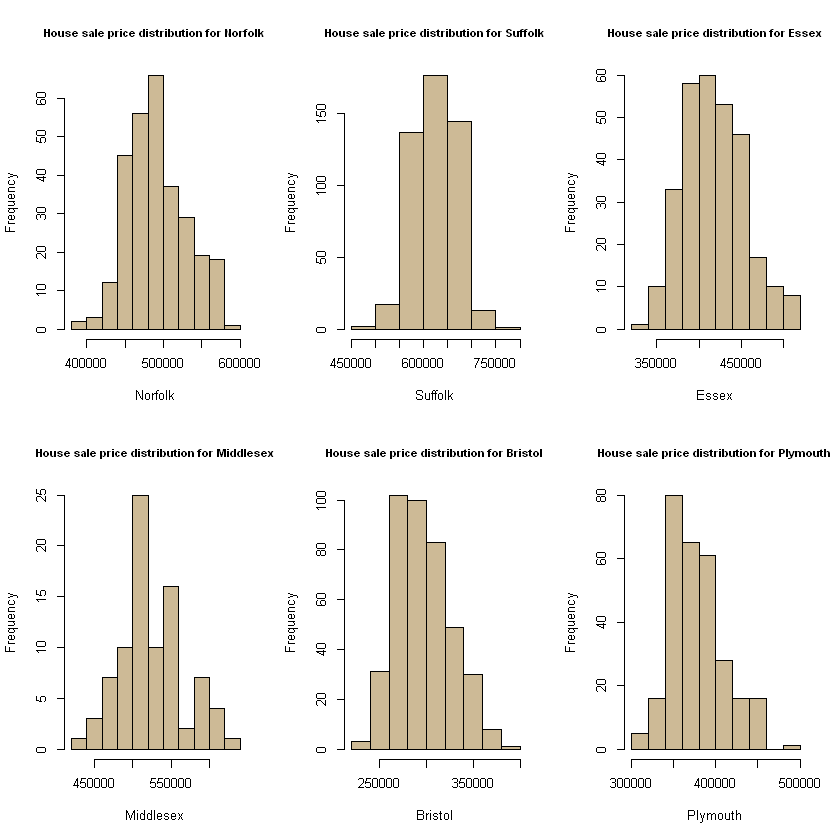

In [29]:
# Name (county):


par(mfrow = c(2,3))

b(Norfolk, 'Norfolk', y = 'Frequency', main = 'House sale price distribution for %s', graph = hist)
b(Suffolk, 'Suffolk', y = 'Frequency', main = 'House sale price distribution for %s', graph = hist)
b(Essex, 'Essex', y = 'Frequency', main = 'House sale price distribution for %s', graph = hist)
b(Middlesex, 'Middlesex', y = 'Frequency', main = 'House sale price distribution for %s', graph = hist)
b(Bristol, 'Bristol', y = 'Frequency', main = 'House sale price distribution for %s', graph = hist)
b(Plymouth, 'Plymouth', y = 'Frequency', main = 'House sale price distribution for %s', graph = hist)

par(mfrow = c(1,1))

shapiro.test(Norfolk)
shapiro.test(Suffolk)
shapiro.test(Essex)
shapiro.test(Middlesex)
shapiro.test(Bristol)
shapiro.test(Plymouth)


	Shapiro-Wilk normality test

data:  year2017
W = 0.92482, p-value = 7.731e-15



	Shapiro-Wilk normality test

data:  year2018
W = 0.94275, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  year2019
W = 0.94733, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  year2020
W = 0.94886, p-value = 6.575e-10


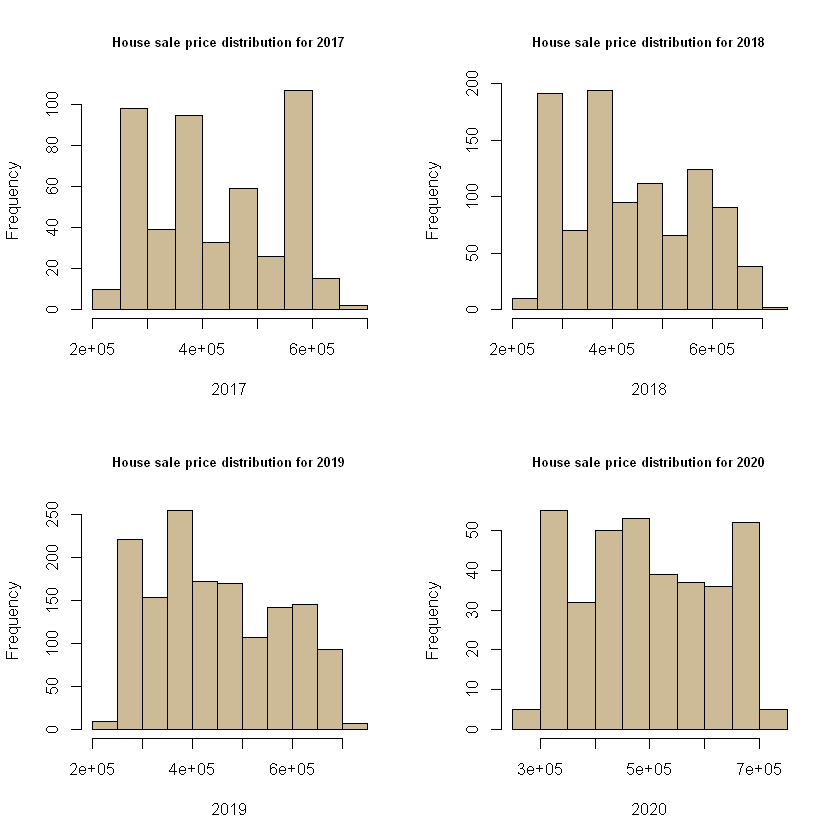

In [30]:
# Year: 

par(mfrow = c(2,2))

b(year2017, '2017', y = 'Frequency', main = 'House sale price distribution for %s', graph = hist)
b(year2018, '2018', y = 'Frequency', main = 'House sale price distribution for %s', graph = hist)
b(year2019, '2019', y = 'Frequency', main = 'House sale price distribution for %s', graph = hist)
b(year2020, '2020', y = 'Frequency', main = 'House sale price distribution for %s', graph = hist)

par(mfrow = c(1,1))


shapiro.test(year2017)
shapiro.test(year2018)
shapiro.test(year2019)
shapiro.test(year2020)

In [32]:
install.packages("car")

also installing the dependencies 'Rcpp', 'matrixStats', 'RcppArmadillo', 'zip', 'SparseM', 'MatrixModels', 'conquer', 'openxlsx', 'minqa', 'nloptr', 'statmod', 'RcppEigen', 'carData', 'abind', 'pbkrtest', 'quantreg', 'rio', 'lme4'



package 'Rcpp' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'Rcpp'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\franc\Anaconda3\envs\MSDataAnalytics\Lib\R\library\00LOCK\Rcpp\libs\x64\Rcpp.dll to C:\Users\franc\Anaconda3\envs\MSDataAnalytics\Lib\R\library\Rcpp\libs\x64\Rcpp.dll: Permission denied"Warning message:
"restored 'Rcpp'"

package 'matrixStats' successfully unpacked and MD5 sums checked
package 'RcppArmadillo' successfully unpacked and MD5 sums checked
package 'zip' successfully unpacked and MD5 sums checked
package 'SparseM' successfully unpacked and MD5 sums checked
package 'MatrixModels' successfully unpacked and MD5 sums checked
package 'conquer' successfully unpacked and MD5 sums checked
package 'openxlsx' successfully unpacked and MD5 sums checked
package 'minqa' successfully unpacked and MD5 sums checked
package 'nloptr' successfully unpacked and MD5 sums checked
package 'statmod' successfully unpacked and MD5 sums checked
package 'RcppEigen' successfully unpacked and MD5 sums checked
package 'carData' successfully unpacked and MD5 sums checked
package 'abind' successfully unpacked and MD5 sums checked
package 'pbkrtest' successfully unpacked and MD5 sums checked
package 'quantreg' successfully unpacked and MD5 sums checked
package 'rio' successfully unpacked and MD5 sums checked
package 'lme4' su

In [33]:
library(car)

# County:

leveneTest(df$median_sale_price, Name)
leveneTest(df$median_sale_price, Year)

Warning message:
"package 'car' was built under R version 3.6.3"Loading required package: carData
Warning message:
"package 'carData' was built under R version 3.6.3"
Attaching package: 'car'

The following object is masked from 'package:dplyr':

    recode

The following object is masked from 'package:purrr':

    some



,Df,F value,Pr(>F)
group,5,12.96683,2.019608e-12
,1834,NA,NA


,Df,F value,Pr(>F)
group,3,0.9713918,0.4052886
,1836,NA,NA


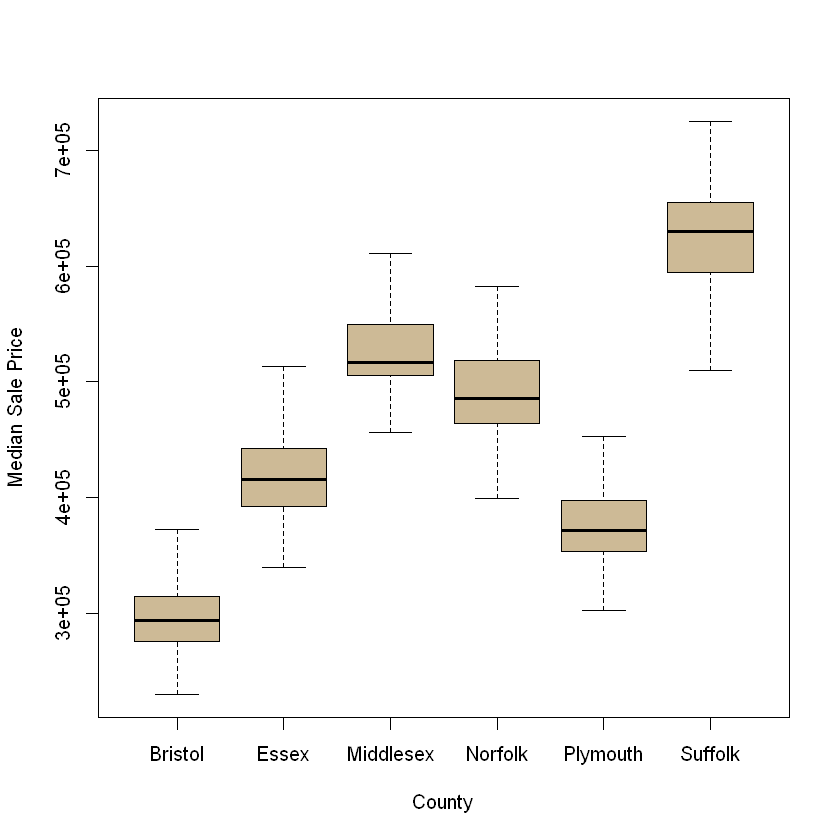

In [35]:
##### Graphical comparisons# of name and year #####:

boxplot(df$median_sale_price ~ df$Name, col = 'wheat3',
        ylab = 'Median Sale Price', xlab = 'County')




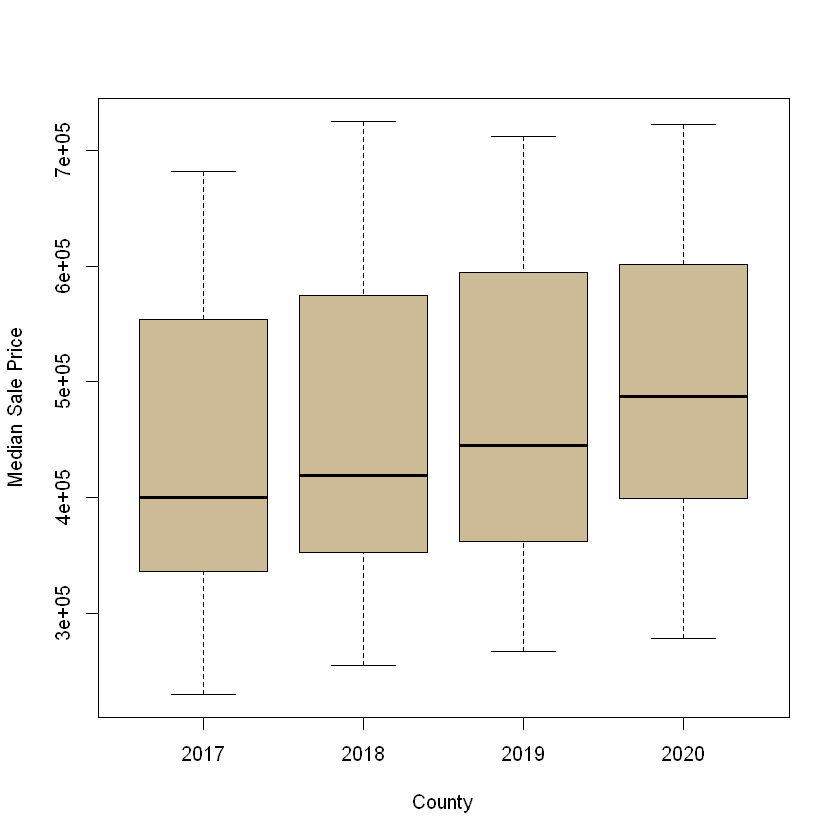

In [36]:
boxplot(df$median_sale_price ~ df$Year, col = 'wheat3',
        ylab = 'Median Sale Price', xlab = 'County')

In [ ]:

df2017 <- subset(df, Year == '2017')
df2018  <- subset(df, Year == '2018')
df2019 <- subset(df, Year == '2019')
df2020  <- subset(df, Year == '2020')